In [11]:
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import os

In [12]:
classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path
    
def get_test_annotations(csv_file, image_nums):
    anns = []
    for image_num in image_nums:
        ann = csv_file.PredictionString[image_num].split(" ")
        ann = list(filter(None, ann))
        n = 6
        ann = [ann[i * n:(i + 1) * n] for i in range((len(ann) + n - 1) // n )] 
        anns.append(ann)
        
    return anns

def read_image(dataset_path, file_paths):
    images = []
    for file_path in file_paths:
        image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return images

def plot_test_bbox(images, anns, image_num):
    fig, ax = plt.subplots(1,3, figsize=(18,18))
    ax = ax.flatten()
    for i in range(len(images)):
        for ann in anns[i]:
            (label, score, xmin, ymin, xmax, ymax) = map(float, ann)
            if score > 0.5:
                c = classes[int(label)]
                image = cv2.rectangle(images[i], (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 0, 255), 3)
                cv2.putText(image, classes[int(label)], (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)

        ax[i].imshow(image) 
        ax[i].set_title(image_num[i])   
        ax[i].axis('off')
    plt.show()

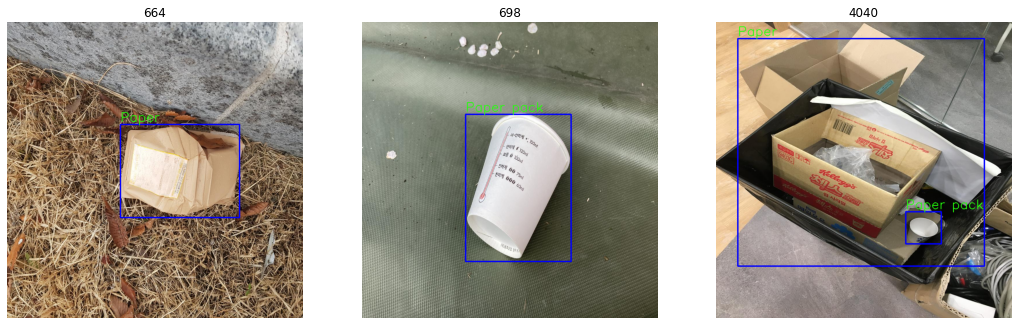

In [26]:
work_dir = '/opt/ml/detection/object-detection-level2-cv-17/efficientdet/'
dataset_path = '/opt/ml/detection/dataset/'
epoch = 'latest'

n = 3

data_frame = pd.read_csv(os.path.join(work_dir, f'submission_d5_e70.csv'))
image_num = random.sample(range(0, len(data_frame) - 1), n)
# image_num = random.randint(0, (len(data_frame) - 1))
file_path = data_frame.image_id[image_num]
anns = get_test_annotations(data_frame, image_num)
image = read_image(dataset_path, file_path)
plot_test_bbox(image, anns, image_num)